### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tiendas = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
#Función para calcular la facturación de cada tienda
def facturacion(tienda):
  precios = sum(tienda['Precio'])
  costos = sum(tienda['Costo de envío'])
  total = int(precios - costos)
  return total

#Cálculo de la facturación por tienda y total general
facturaciones = []
facturacion_tienda = [facturacion(tienda), facturacion(tienda2), facturacion(tienda3), facturacion(tienda4)]
facturacion_total = sum(facturacion_tienda)
#Cálculo del porcentaje de facturación de cada tienda
porc_facturacion = []
for n in facturacion_tienda:
  porciento = (n / facturacion_total)*100
  porc_facturacion.append(round(porciento, 2))

facturaciones = list(zip(tiendas, facturacion_tienda, porc_facturacion))

#Generación del mensaje final
mensaje_facturacion = 'La facturación de las tiendas se distribuye de la siguiente manera:\n'
for i in range(len(facturaciones)):
  mensaje_facturacion += f' La tienda {facturaciones[i][0]}: facturó la cantidad de ${facturaciones[i][1]:,}, lo que representa el {facturaciones[i][2]}% del total \n'
print(mensaje_facturacion)

La facturación de las tiendas se distribuye de la siguiente manera:
 La tienda tienda1: facturó la cantidad de $1,089,502,500, lo que representa el 26.13% del total 
 La tienda tienda2: facturó la cantidad de $1,056,858,400, lo que representa el 25.35% del total 
 La tienda tienda3: facturó la cantidad de $1,039,503,000, lo que representa el 24.93% del total 
 La tienda tienda4: facturó la cantidad de $983,058,300, lo que representa el 23.58% del total 



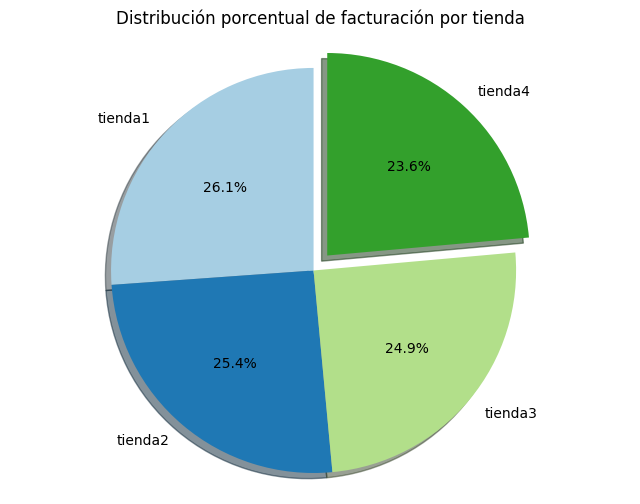

In [ ]:
import matplotlib.pyplot as plt

# Encontrar el índice del menor porcentaje
min_index = porc_facturacion.index(min(porc_facturacion))

# Crear una lista de "explodes" para resaltar la menor facturación
# Solo explotamos el segmento con menor valor
explode = [0.1 if i == min_index else 0 for i in range(len(porc_facturacion))]

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(porc_facturacion, labels=tiendas, autopct='%1.1f%%', startangle=90,
        explode=explode, shadow=True, colors=plt.cm.Paired.colors)

plt.title('Distribución porcentual de facturación por tienda')
plt.axis('equal')  # Mantiene la forma circular
plt.show() # Muestra el gráfico en pantalla

# 2. Ventas por categoría

In [ ]:
# Crear lista con todas las categorías (sin duplicados y ordenadas)
tupla1 = list(zip(tienda['Categoría del Producto'], tienda['Precio']))
categoria = sorted(list(set(list(tienda['Categoría del Producto']))))

# Definir función para calcular % de ventas por categoría
def categoria_f(sucursal):
  tupla = list(zip(sucursal['Categoría del Producto'], sucursal['Precio']))
  total_tienda = sum(sucursal['Precio'])
  valores_por_categoria = []
  for n in categoria:
    lista_categoria = []
    for i in range(len(tupla)):
      if tupla[i][0] == n:
        lista_categoria.append(tupla[i][1])
    valores_por_categoria.append(round((sum(lista_categoria)/total_tienda)*100,2))
  return valores_por_categoria

#Aplicar la función a cada tienda
resultados = {
    'Tienda_1': categoria_f(tienda),
    'Tienda_2': categoria_f(tienda2),
    'Tienda_3': categoria_f(tienda3),
    'Tienda_4': categoria_f(tienda4)
}

# Sumar 3 categorías específicas de cada tienda
test_lista = list(resultados.values())
suma_mayores = [(valor[2]+valor[3]+valor[7]) for valor in test_lista]
print(suma_mayores)

[85.22, 83.82, 85.7, 85.25]


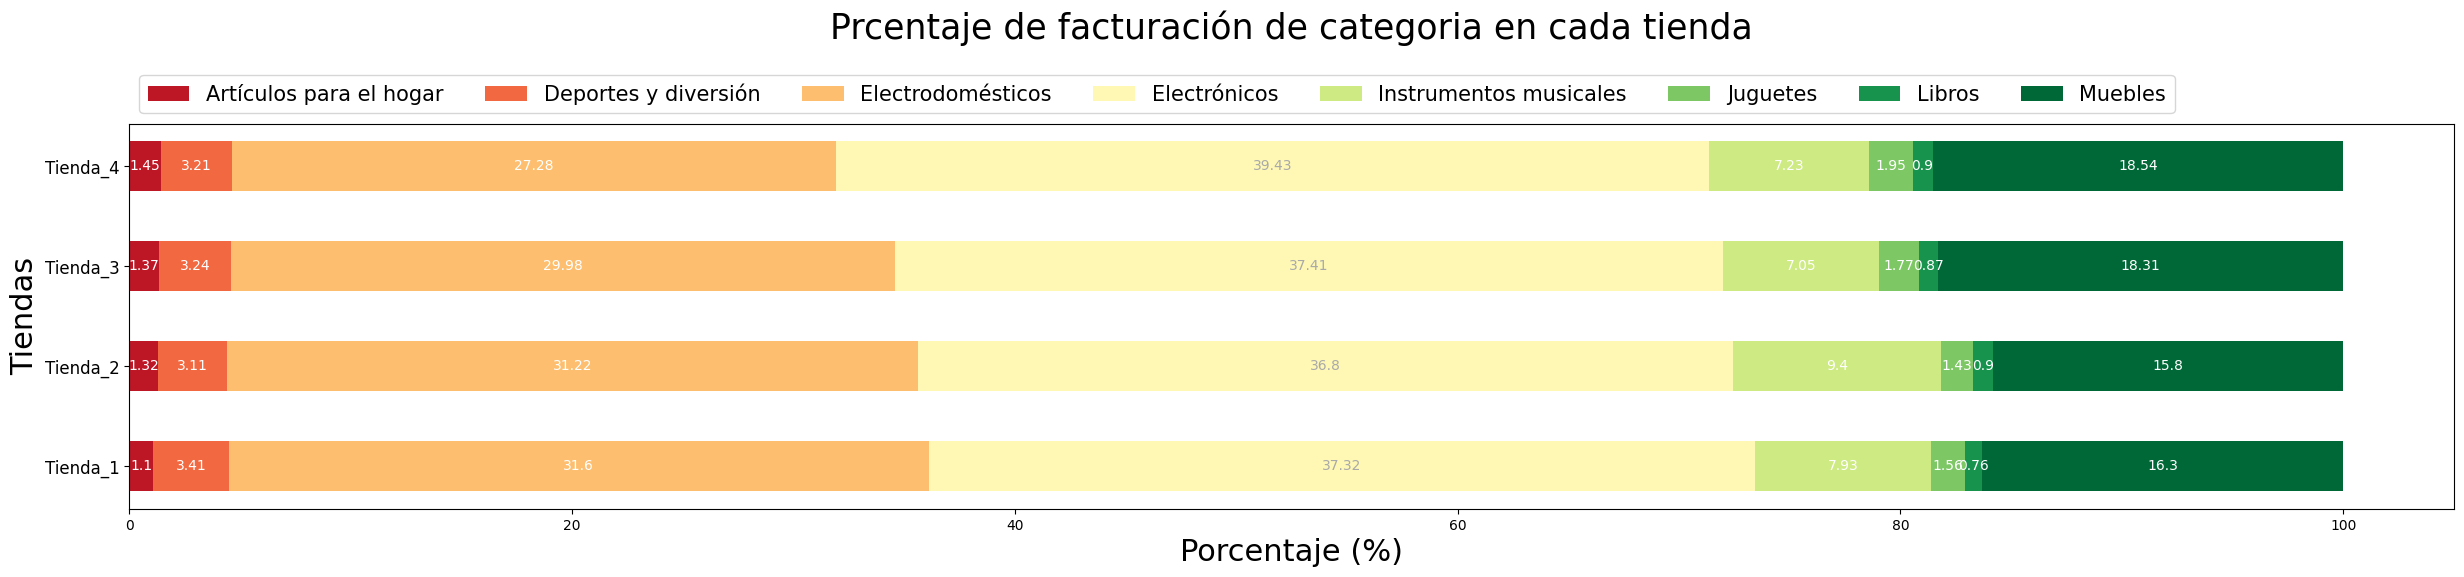

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(resultados.keys())
valores_categoria = np.array(list(resultados.values()))
valores_cum = valores_categoria.cumsum(axis=1)
category_colors = plt.colormaps['RdYlGn'](
    np.linspace(0.05, 1.05, valores_categoria.shape[1]))

plt.subplots(figsize=(30, 5))

for i, (colname, color) in enumerate(zip(categoria, category_colors)):
  widths = valores_categoria[:, i]
  starts = valores_cum[:, i] - widths
  rects = plt.barh(labels, widths, left=starts, height=0.5,
                   label=colname, color=color)

  r, g, b, _ = color
  text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
  plt.bar_label(rects, label_type='center', color=text_color)
  plt.legend(ncols=len(categoria), bbox_to_anchor=(0, 1),
             loc='lower left', fontsize='15')

plt.yticks(fontsize=12)
plt.title('Prcentaje de facturación de categoria en cada tienda', fontsize=25, y=1.2)
plt.xlabel('Porcentaje (%)', fontsize=22)
plt.ylabel('Tiendas', fontsize=22)
plt.show()

In [ ]:
categoria = sorted(list(set(list(tienda['Categoría del Producto']))))

def categoria_contador(sucursal):
  categorias_tienda = (sucursal['Categoría del Producto'])
  cantidades_por_categoria = []
  for n in categoria:
    contador_categoria = 0
    for i in categorias_tienda:
      if i == n:
        contador_categoria += 1
    cantidades_por_categoria.append(contador_categoria)
  return cantidades_por_categoria

resultados_categorias = {
    'Tienda_1': categoria_contador(tienda),
    'Tienda_2': categoria_contador(tienda2),
    'Tienda_3': categoria_contador(tienda3),
    'Tienda_4': categoria_contador(tienda4)
}
resultados_categorias

{'Tienda_1': [171, 284, 312, 448, 182, 324, 173, 465],
 'Tienda_2': [181, 275, 305, 422, 224, 313, 197, 442],
 'Tienda_3': [177, 277, 278, 451, 177, 315, 185, 499],
 'Tienda_4': [201, 277, 254, 451, 170, 338, 187, 480]}

<ipython-input-7-c25d5798babe>:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


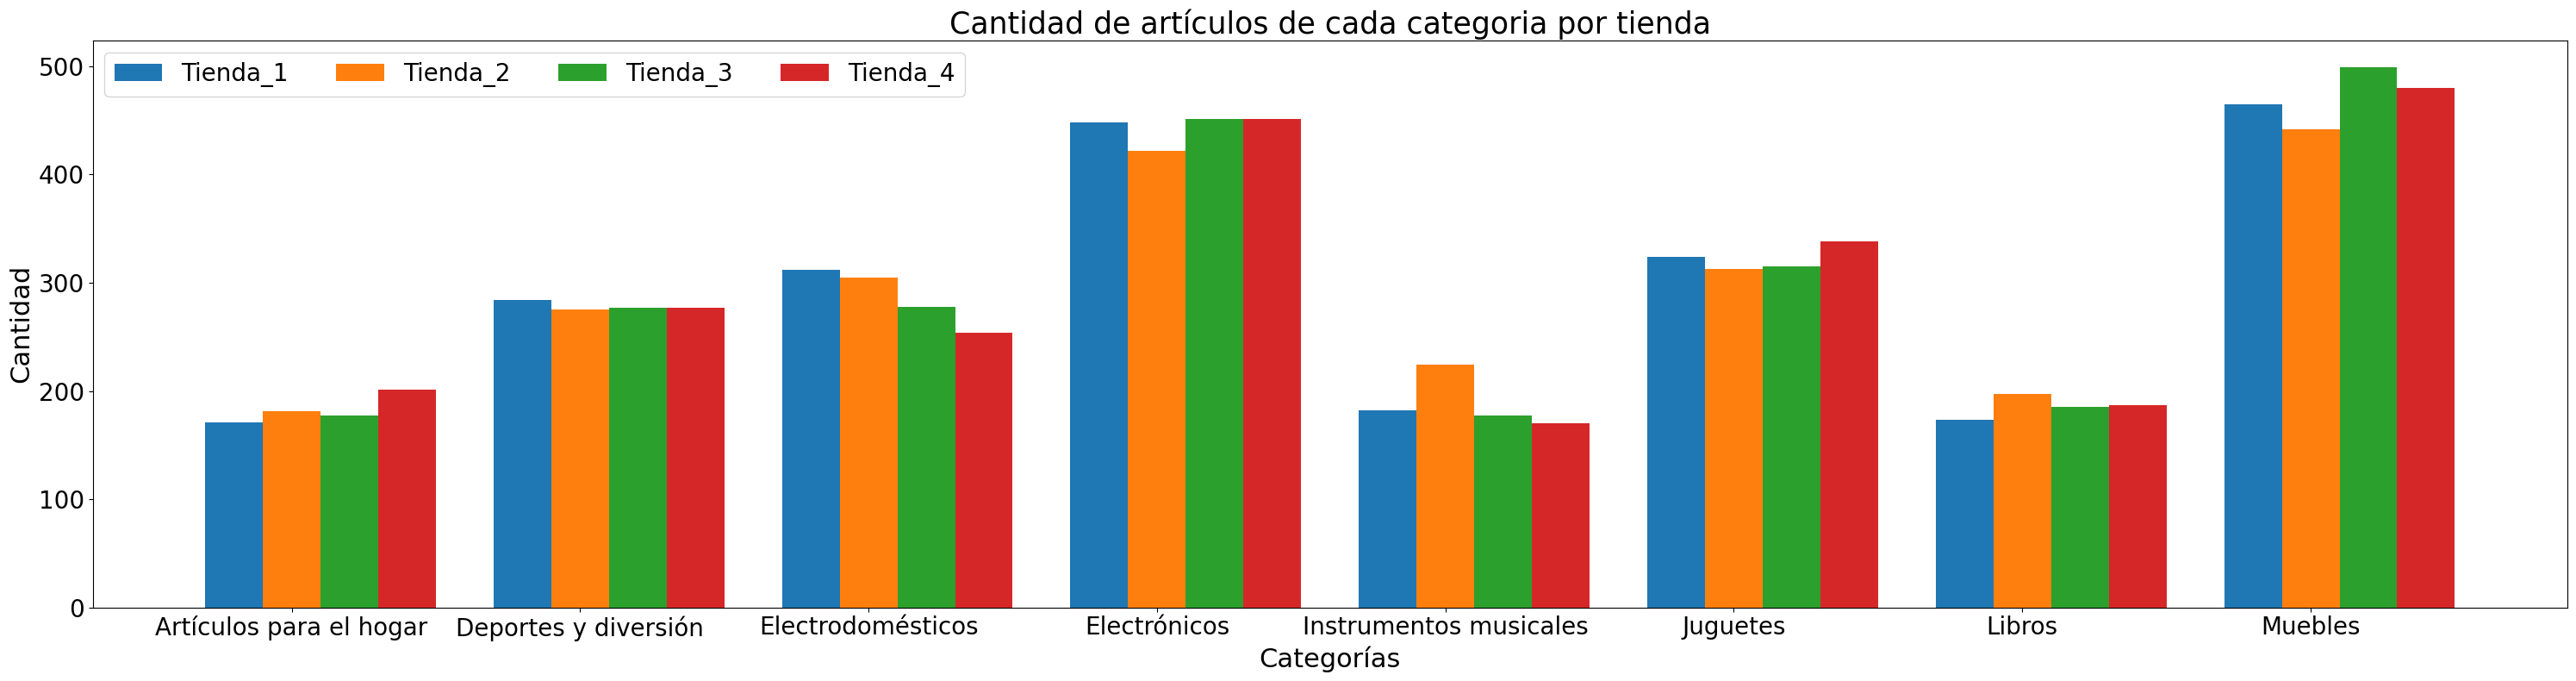

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(categoria))
width = 0.2
multiplier = 0

plt.subplots(layout="constrained", figsize=(30, 8))
for  atributo, medida in resultados_categorias.items():
  offset = width*multiplier
  barras = plt.bar(x + offset, medida, width, label=atributo)
  multiplier += 1

plt.xticks(x + width, categoria, fontsize = 20)
plt.legend(loc='upper left', ncols= len(categoria), fontsize= 20)
plt.yticks(fontsize= 20)
plt.title('Cantidad de artículos de cada categoria por tienda', fontsize = 25)
plt.xlabel('Categorías', fontsize = 22)
plt.ylabel('Cantidad', fontsize = 22)

plt.tight_layout()
plt.show()

In [ ]:
 def categoria_total(sucursal):
  tupla = list(zip(sucursal['Categoría del Producto'], sucursal['Precio']))
  categoria = list(set(list(sucursal['Categoría del Producto'])))
  valores_por_categoria = []
  for n in categoria:
    lista_categoria = []
    for i in range(len(tupla)):
      if tupla[i][0] == n:
        lista_categoria.append(tupla[i][1])
    valores_por_categoria.append({n: sum(lista_categoria)})
  categoria_prueba = sorted(valores_por_categoria, key=lambda x: sum(x.values()), reverse=True)

  resultado = []
  for n in categoria:
    contador = 0
    for articulo, precio in tupla:
      if articulo == n:
        contador += 1
    resultado.append({n: contador})
  contador_categoria = sorted(resultado, key=lambda x: sum(x.values()), reverse=True)

  mensaje = f'Las ventas por categoría fueron:\n'
  for n in categoria_prueba:
    for clasificacion, total in n.items():
      mensaje += f'{clasificacion} = ${total:,}\n'
  mensaje = mensaje + f'Y la cantidad de artículos vendidos por categoría fueron:\n'
  for m in contador_categoria:
    for clasificacion_2, contadores in m.items():
      mensaje += f'{clasificacion_2} = {contadores}\n'
  return mensaje

test_number_1 = categoria_total(tienda)
test_number_2 = categoria_total(tienda2)
test_number_3 = categoria_total(tienda3)
test_number_4 = categoria_total(tienda4)

print(f'{tiendas[0]}: {test_number_1}')
print(f'{tiendas[1]}: {test_number_2}')
print(f'{tiendas[2]}: {test_number_3}')
print(f'{tiendas[3]}: {test_number_4}')

tienda1: Las ventas por categoría fueron:
Electrónicos = $429,493,500.0
Electrodomésticos = $363,685,200.0
Muebles = $187,633,700.0
Instrumentos musicales = $91,299,000.0
Deportes y diversión = $39,290,000.0
Juguetes = $17,995,700.0
Artículos para el hogar = $12,698,400.0
Libros = $8,784,900.0
Y la cantidad de artículos vendidos por categoría fueron:
Muebles = 465
Electrónicos = 448
Juguetes = 324
Electrodomésticos = 312
Deportes y diversión = 284
Instrumentos musicales = 182
Libros = 173
Artículos para el hogar = 171

tienda2: Las ventas por categoría fueron:
Electrónicos = $410,831,100.0
Electrodomésticos = $348,567,800.0
Muebles = $176,426,300.0
Instrumentos musicales = $104,990,300.0
Deportes y diversión = $34,744,500.0
Juguetes = $15,945,400.0
Artículos para el hogar = $14,746,900.0
Libros = $10,091,200.0
Y la cantidad de artículos vendidos por categoría fueron:
Muebles = 442
Electrónicos = 422
Juguetes = 313
Electrodomésticos = 305
Deportes y diversión = 275
Instrumentos musicale

# 3. Calificación promedio de la tienda


In [ ]:
def promedios(sucursal):
    vendedores = list(set(sucursal['Vendedor']))
    calificacion_promedio = []

# Calcular promedio por vendedor
    for vendedor in vendedores:

# Filtrar las calificaciones del vendedor actual
        calificaciones = sucursal[sucursal['Vendedor'] == vendedor]['Calificación']
        promedio = round(calificaciones.mean(), 2)
        calificacion_promedio.append({vendedor: promedio})

# Ordenar de mayor a menor por promedio
    calificacion_promedio = sorted(calificacion_promedio, key=lambda x: sum(x.values()), reverse=True)

# Calcular promedio total de la tienda
    promedio_tienda = round(sucursal['Calificación'].mean(), 2)

# Crear mensaje
    mensaje = f'📊La calificación promedio de la tienda es de {promedio_tienda}\n🏆 las calificaciones por vendedor fueron:\n'
    lista_vendedores = []
    lista_promedios = []

    for calificacion in calificacion_promedio:
        for vendedor, promedio in calificacion.items():
            mensaje += f'{vendedor}: {promedio}\n'
            lista_vendedores.append(vendedor)
            lista_promedios.append(promedio)

    return lista_vendedores, lista_promedios, mensaje, promedio_tienda


In [ ]:
import matplotlib.pyplot as plt

def grafico(lista_vendedor, lista_calificacion, promedio, nombre_tienda):
    plt.subplots()
    plt.barh(lista_vendedor, lista_calificacion, align='center', color='skyblue')
    plt.ylabel('Vendedores')
    plt.xlabel('Calificación')
    plt.title(f'{nombre_tienda} - Calificación promedio: {promedio}')

# Línea roja para marcar el promedio
    plt.axvline(promedio, linestyle='--', color='red', label=f'Promedio: {promedio}')
    plt.xlim(min(lista_calificacion) - 0.5, max(lista_calificacion) + 0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()



--- Tienda 1 ---
📊La calificación promedio de la tienda es de 3.98
🏆 las calificaciones por vendedor fueron:
Ángel Rodriguez: 4.25
Rafael Acosta: 4.07
Santiago Silva: 4.06
Felipe Santos: 4.04
Beatriz Morales: 4.02
Mariana Herrera: 4.0
Blanca Ramirez: 3.99
Juliana Costa: 3.98
Camila Rivera: 3.95
Pedro Gomez: 3.94
Lucas Olivera: 3.93
Maria Alfonso: 3.88
Juan Fernandez: 3.85
Izabela de León: 3.75



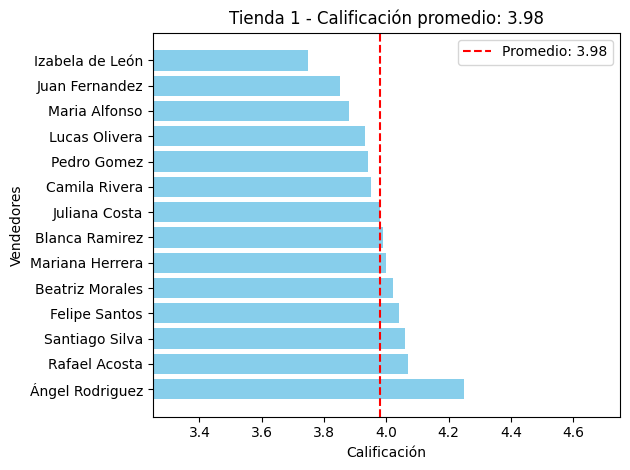


--- Tienda 2 ---
📊La calificación promedio de la tienda es de 4.04
🏆 las calificaciones por vendedor fueron:
Mariana Herrera: 4.19
Pedro Gomez: 4.17
Camila Rivera: 4.14
Felipe Santos: 4.11
Maria Alfonso: 4.08
Ángel Rodriguez: 4.07
Juan Fernandez: 4.06
Rafael Acosta: 4.01
Izabela de León: 4.0
Beatriz Morales: 3.95
Lucas Olivera: 3.95
Juliana Costa: 3.94
Santiago Silva: 3.94
Blanca Ramirez: 3.93



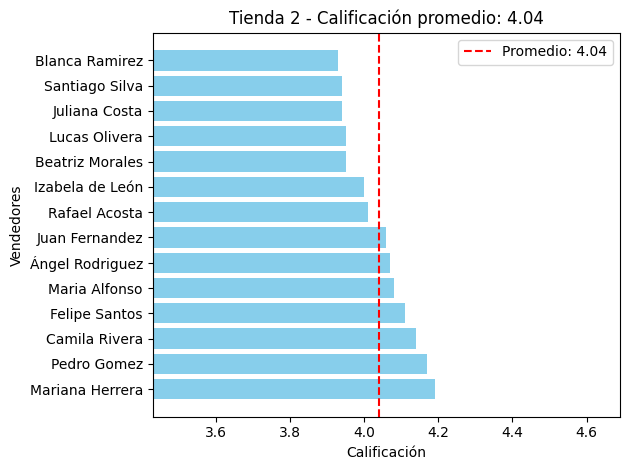


--- Tienda 3 ---
📊La calificación promedio de la tienda es de 4.05
🏆 las calificaciones por vendedor fueron:
Beatriz Morales: 4.21
Pedro Gomez: 4.19
Juan Fernandez: 4.18
Ángel Rodriguez: 4.18
Rafael Acosta: 4.16
Felipe Santos: 4.14
Camila Rivera: 4.13
Mariana Herrera: 4.06
Lucas Olivera: 4.02
Blanca Ramirez: 3.98
Santiago Silva: 3.96
Maria Alfonso: 3.95
Juliana Costa: 3.81
Izabela de León: 3.73



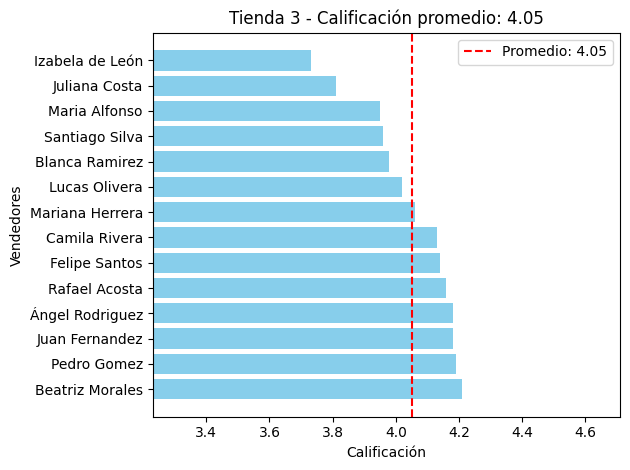


--- Tienda 4 ---
📊La calificación promedio de la tienda es de 4.0
🏆 las calificaciones por vendedor fueron:
Santiago Silva: 4.16
Blanca Ramirez: 4.08
Mariana Herrera: 4.04
Ángel Rodriguez: 4.04
Juan Fernandez: 4.03
Felipe Santos: 4.02
Beatriz Morales: 4.02
Rafael Acosta: 4.0
Juliana Costa: 3.95
Lucas Olivera: 3.95
Izabela de León: 3.94
Camila Rivera: 3.92
Maria Alfonso: 3.91
Pedro Gomez: 3.86



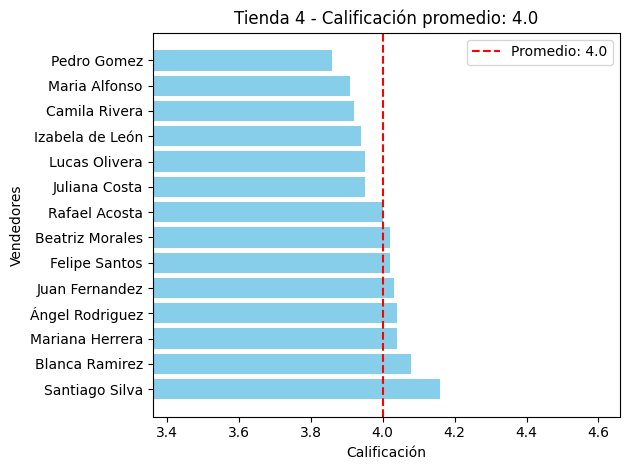

In [ ]:
tiendas_data = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas_data.items():
    vendedores, calificaciones, mensaje, promedio = promedios(df)
    print(f'\n--- {nombre} ---\n{mensaje}')
    grafico(vendedores, calificaciones, promedio, nombre)


# 4. Productos más y menos vendidos

In [ ]:
def contador2(sucursal):
    productos = list(sucursal['Producto'])

    # Combinamos producto y su categoría para obtener únicos
    productos_unicos = list(set(zip(sucursal['Producto'], sucursal['Categoría del Producto'])))

    cuenta_total = []

    # Contamos cuántas veces se repite cada producto
    for producto, clasificacion in productos_unicos:
        contador = productos.count(producto)
        cuenta_total.append((producto, clasificacion, contador))

    # Ordenamos de mayor a menor por cantidad vendida
    contador = sorted(cuenta_total, key=lambda x: x[2], reverse=True)

    # Encabezados
    encabezados = ("Nombre", "Categoría", "Cantidad")

    # Mensaje de salida
    mensaje = '🛍️ Los 10 productos más vendidos fueron:\n'
    mensaje += f"{encabezados[0]:<30} | {encabezados[1]:<25} | {encabezados[2]:<10}\n"
    mensaje += f'{"-" * 70} \n'

    for n in range(10):
        mensaje += f'{contador[n][0]:<30} | {contador[n][1]:<25} | {contador[n][2]:<10}\n'

    mensaje += f'\n📦 Y los 10 productos menos vendidos fueron:\n'
    mensaje += f"{encabezados[0]:<30} | {encabezados[1]:<25} | {encabezados[2]:<10}\n"
    mensaje += f'{"-" * 70} \n'

    for n in range(-10, 0):  # últimos 10
        mensaje += f'{contador[n][0]:<30} | {contador[n][1]:<25} | {contador[n][2]:<10}\n'

    return mensaje


In [ ]:
print("🔍 Análisis de productos para Tienda 1\n")
print(contador2(tienda))

print("🔍 Análisis de productos para Tienda 2\n")
print(contador2(tienda2))

print("🔍 Análisis de productos para Tienda 3\n")
print(contador2(tienda3))

print("🔍 Análisis de productos para Tienda 4\n")
print(contador2(tienda4))


🔍 Análisis de productos para Tienda 1

🛍️ Los 10 productos más vendidos fueron:
Nombre                         | Categoría                 | Cantidad  
---------------------------------------------------------------------- 
TV LED UHD 4K                  | Electrónicos              | 60        
Armario                        | Muebles                   | 60        
Microondas                     | Electrodomésticos         | 60        
Secadora de ropa               | Electrodomésticos         | 58        
Bloques de construcción        | Juguetes                  | 56        
Mesa de noche                  | Muebles                   | 56        
Balón de baloncesto            | Deportes y diversión      | 55        
Bicicleta                      | Deportes y diversión      | 54        
Vaso térmico                   | Deportes y diversión      | 54        
Impresora                      | Electrónicos              | 54        

📦 Y los 10 productos menos vendidos fueron:
Nombre     

# 5. Envío promedio por tienda

In [ ]:
total_envios ={
    'Tienda_1': sum(tienda['Costo de envío']),
    'Tienda_2': sum(tienda2['Costo de envío']),
    'Tienda_3': sum(tienda3['Costo de envío']),
    'Tienda_4': sum(tienda4['Costo de envío'])
}
total_envios

{'Tienda_1': 61377900.0,
 'Tienda_2': 59485100.0,
 'Tienda_3': 58516600.0,
 'Tienda_4': 55317400.0}

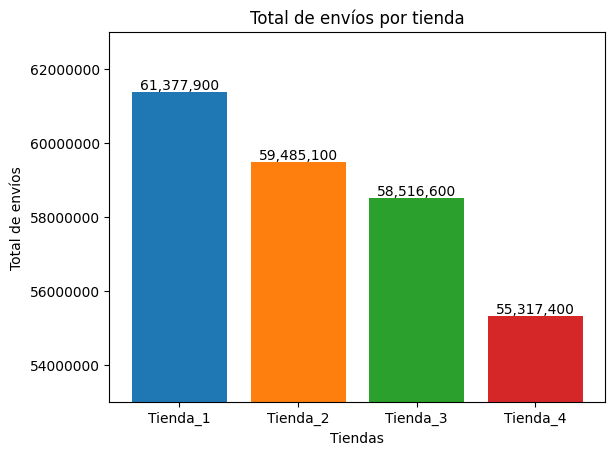

In [ ]:
# Datos para el gráfico
tiendas = list(total_envios.keys())
envios = list(total_envios.values())
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear barras
barras = ax.bar(tiendas, envios, color=bar_colors)

# Etiquetas
ax.set_ylabel('Total de envíos')
ax.set_xlabel('Tiendas')
ax.set_title('Total de envíos por tienda')

# Mostrar los valores sobre las barras
ax.bar_label(barras, labels=[f'{int(val):,}' for val in envios], label_type='edge')

# Desactivar notación científica en eje Y
ax.yaxis.get_major_formatter().set_scientific(False)

# Ajustar el rango del eje Y si es necesario
ax.set_ylim(53000000, 63000000)

# Mostrar gráfico
plt.show()

In [ ]:
def envio(sucursal):
  costos_tienda = list(zip(sucursal['Lugar de Compra'], sucursal['Costo de envío']))
  total_costo = 0
  total_datos = len(costos_tienda)
  costo_envio_total = 0
  for n in range(total_datos):
    costo_envio_total += costos_tienda[n][1]
    if n == 0:
      valor_maximo = costos_tienda[n][1]
      lugar_maximo = costos_tienda[n][0]
    else:
      if costos_tienda[n][1] > valor_maximo:
        valor_maximo = costos_tienda[n][1]
        lugar_maximo = costos_tienda[n][0]
  promedio_envio = float(costo_envio_total)/float(total_datos)
  mensaje_envio = f'El promedio de envio es {round(promedio_envio, 2)}\n'
  mensaje_envio += f'El valor máximo fue de ${valor_maximo}, con lugar de compra {lugar_maximo}'
  return mensaje_envio

In [ ]:
print("🔍 Análisis de Costos de Envío\n")

print("📦 Tienda 1")
print(envio(tienda))
print()

print("📦 Tienda 2")
print(envio(tienda2))
print()

print("📦 Tienda 3")
print(envio(tienda3))
print()

print("📦 Tienda 4")
print(envio(tienda4))

🔍 Análisis de Costos de Envío

📦 Tienda 1
El promedio de envio es 26018.61
El valor máximo fue de $160800.0, con lugar de compra Cali

📦 Tienda 2
El promedio de envio es 25216.24
El valor máximo fue de $162500.0, con lugar de compra Medellín

📦 Tienda 3
El promedio de envio es 24805.68
El valor máximo fue de $158400.0, con lugar de compra Medellín

📦 Tienda 4
El promedio de envio es 23459.46
El valor máximo fue de $154700.0, con lugar de compra Bogotá


# 6. Análisis Geográfico

In [ ]:
import folium
from folium.plugins import HeatMap

# Función para procesar la información por tienda
def mapa2(sucursal):
    ubicacion = list(zip(sucursal['lat'], sucursal['lon'], sucursal['Precio']))
    ub_unicas = list(set(list(zip(sucursal['lat'], sucursal['lon']))))
    frecuencia_venta = []

    for n in ub_unicas:
        cuenta = 0
        for lat, lon, costo in ubicacion:
            if n[0] == lat and n[1] == lon:
                cuenta += costo
        frecuencia_venta.append([n[0], n[1], cuenta])

    return frecuencia_venta

# Obtener los datos de las 4 tiendas
ubicacion_tienda1 = mapa2(tienda)
ubicacion_tienda2 = mapa2(tienda2)
ubicacion_tienda3 = mapa2(tienda3)
ubicacion_tienda4 = mapa2(tienda4)

# Unir todas las ubicaciones
todas_las_ubicaciones = (
    ubicacion_tienda1 +
    ubicacion_tienda2 +
    ubicacion_tienda3 +
    ubicacion_tienda4
)

# Crear el mapa centrado en Colombia
mapa_calor = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Agregar la capa de calor
HeatMap(todas_las_ubicaciones).add_to(mapa_calor)

# Mostrar el mapa
mapa_calor


# Análisis de los resultados obtenidos

A partir de un análisis realizado mediante Python, se evaluó el desempeño general de las ventas de cuatro tiendas propiedad del señor Juan. El propósito de este informe es orientar al cliente en la elección de la tienda más estratégica para vender y, con ello, financiar sus proyectos.

Se analizaron exhaustivamente los siguientes aspectos: ventas totales, gama de productos, calificación de la experiencia del cliente y ubicación geográfica de cada tienda.

### 1. Ingresos totales por tienda

Se estimaron las ganancias netas por tienda considerando los ingresos generados menos los costos de envío por producto. Los resultados muestran que la tienda 4 presenta el desempeño más bajo. En particular, se observa una diferencia de facturación de aproximadamente $106.444,2 respecto a la tienda con mayores ingresos (tienda 1), lo que representa una variación del 2,55% respecto al total de las cuatro tiendas.

### 2. Categorías de productos más y menos vendidas

**a) Facturación por categoría**

Se evaluaron los ingresos por categoría como porcentaje del total, representados en el gráfico "Porcentaje de facturación de categoría en cada tienda". Las tres categorías predominantes en todas las tiendas son:

*   Electrodomésticos
*   Electrónicos
*   Muebles

Los porcentajes de facturación combinados de estas categorías por tienda son:

*   Tienda 1: 85,22%
*   Tienda 2: 83,82%
*   Tienda 3: 85,70%
*   Tienda 4: 85,25%

Esto indica una tendencia homogénea, aunque la tienda 2 muestra una leve menor dependencia de estas categorías.

**b) Volumen de unidades vendidas**

El gráfico "Cantidad de artículos de cada categoría por tienda" muestra lo siguiente:

*   Tienda 4: destaca en la venta de artículos para el hogar y juguetes, pero tiene un bajo volumen de ventas en electrodomésticos. Aumentar las ventas en esta categoría podría mejorar su rentabilidad.

*   Tienda 2: sobresale en instrumentos musicales y libros, compensando su bajo desempeño en electrónicos y muebles, lo cual explica su estabilidad en ingresos.





### 3. Calificaciones promedio por tienda

**a) Calificación global**

*   Tienda 1: calificación más baja con un promedio de 3,98.
*   Tienda 3: mejor evaluación con un promedio de 4,05.

**b) Evaluación del equipo de ventas**

Se analizaron las calificaciones por venta para evaluar la atención al cliente:

*   Tienda 1: tres vendedores tienen calificaciones menores a 3,9, afectando negativamente la percepción general.
*   Tienda 2: presenta el equipo más homogéneo, sin calificaciones inferiores a 3,9.

### 4. Productos más y menos vendidos

El análisis por tienda muestra:

*   Tiendas 1 y 3: los productos más vendidos pertenecen principalmente a Muebles, Electrodomésticos y Electrónicos, lo que contribuye a su alto nivel de facturación.

*   Tienda 2: destaca con instrumentos musicales y libros en el top 5. Sus productos menos vendidos pertenecen a categorías populares en tiendas 1 y 3. Esto podría explicarse por el mayor valor unitario de sus productos y una mayor diversidad en su inventario.

*   Tienda 4: no presenta productos de la categoría de electrodomésticos entre los diez más vendidos, lo que reafirma la necesidad de potenciar esta línea para mejorar sus resultados.

### 5. Costo de envío promedio por tienda

El análisis muestra:

*   Tienda 1: mayor costo total de envíos, lo que puede deberse al alto volumen de ventas o al tamaño/peso de los productos vendidos (principalmente muebles, electrónicos y electrodomésticos).

*   Tienda 4: menor costo promedio de envío, posiblemente por menor volumen en electrodomésticos o por una ubicación geográfica favorable.

Se recomienda un análisis adicional considerando la localización exacta de las tiendas para identificar el principal factor que influye en esta diferencia.

### 6. Análisis de desempeño geográfico

Se identificaron los siguientes patrones:

*   Bogotá y Pereira: mayores volúmenes de venta general.

*   Medellín: concentra la mayor parte de las ventas de las tiendas 1 y 2.

*   Región Norte (Cartagena, Barranquilla, Santa Marta, Valledupar y Riohacha): representa una zona estratégica por su volumen de compras.

*   Otras ciudades como Bucaramanga, Cúcuta, Inírida, Cali y Neiva presentan volúmenes menores.

En la comparación por zona geográfica:

*   Tienda 1 predomina en 7 ciudades, incluyendo Manizales, Armenia y Pereira.

*   En Bogotá y el norte del país, las tiendas 2, 3 y 4 lideran en ganancias.

*   Tienda 3 registra el menor costo de envío promedio en 9 zonas.

*   Tienda 4 reporta los menores costos en Bogotá y el Eje Cafetero.

Estos resultados permiten identificar zonas de alto potencial estratégico para crecimiento o consolidación.

### Conclusión

Con base en el análisis integral, se presentan las siguientes recomendaciones:

*   **Tiendas 2 y 3:** muestran un desempeño sólido, con buenos niveles de venta, satisfacción del cliente y costos logísticos razonables. Se recomienda mantener su operación.

*   **Tienda 1:** aunque lidera en ingresos, sufre de baja satisfacción del cliente y altos costos de envío. Se sugiere realizar un diagnóstico profundo para identificar causas y aplicar mejoras en atención al cliente y logística.

*   **Tienda 4:** a pesar de sus bajos ingresos, tiene buenas calificaciones y los costos logísticos más bajos. Podría beneficiarse de una estrategia de marketing enfocada en electrodomésticos antes de tomar decisiones drásticas.

**Recomendación final:**
Las calificaciones de los clientes y los costos logísticos son factores clave para el desempeño sostenido. Si no se corrigen los problemas detectados en la tienda 1, podría ser más rentable considerar su cierre en favor de fortalecer las otras tres sucursales.